# Implement a Basic CNN for CIFAR10 Classification

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt

2024-05-07 10:30:56.577784: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/hadush/qt/spot-qt/devel/lib:/opt/ros/noetic/lib
2024-05-07 10:30:56.577797: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
# Load and preprocess CIFAR10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

In [5]:
len((datasets.cifar10.load_data()))

2

In [6]:
len(test_images), len(train_images)

(10000, 50000)

In [7]:
train_images.shape

(50000, 32, 32, 3)

In [8]:
# Define the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

2024-05-07 10:31:01.228395: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/hadush/qt/spot-qt/devel/lib:/opt/ros/noetic/lib
2024-05-07 10:31:01.228411: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2024-05-07 10:31:01.228425: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (hadush-GF63-Thin-10SCSR): /proc/driver/nvidia/version does not exist
2024-05-07 10:31:01.228599: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [10]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

2024-05-07 10:31:01.844512: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/10
1558/1563 [============================>.] - ETA: 0s - loss: 1.7451 - accuracy: 0.3512

2024-05-07 10:31:19.981772: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 122880000 exceeds 10% of free system memory.


1563/1563 [==============================] - 19s 12ms/step - loss: 1.7449 - accuracy: 0.3514 - val_loss: 1.4108 - val_accuracy: 0.5030
Epoch 2/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.4064 - accuracy: 0.4979 - val_loss: 1.1928 - val_accuracy: 0.5753
Epoch 3/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.2681 - accuracy: 0.5481 - val_loss: 1.1109 - val_accuracy: 0.5972
Epoch 4/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.1801 - accuracy: 0.5863 - val_loss: 1.0445 - val_accuracy: 0.6285
Epoch 5/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.1068 - accuracy: 0.6120 - val_loss: 1.0193 - val_accuracy: 0.6385
Epoch 6/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.0518 - accuracy: 0.6299 - val_loss: 0.9677 - val_accuracy: 0.6575
Epoch 7/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.9997 - accuracy: 0.6496 - val_loss: 0.9390 - val_accura

2024-05-07 10:34:15.034621: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 122880000 exceeds 10% of free system memory.


313/313 - 1s - loss: 0.9366 - accuracy: 0.6747 - 745ms/epoch - 2ms/step
Test accuracy: 0.6747000217437744


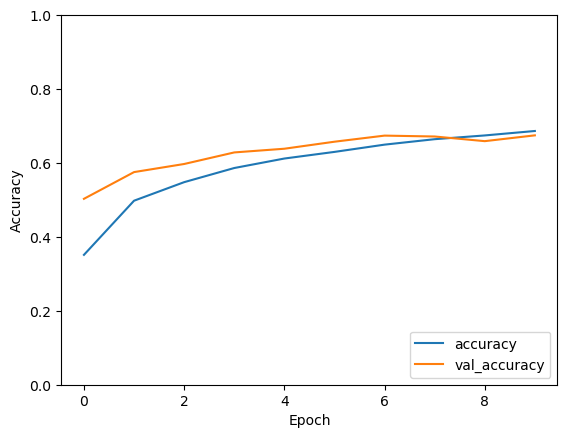

In [11]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
